In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay
import pickle
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

## READING DATA

In [3]:
df = pd.read_csv("../coordinates.csv")    # reading csv file

In [4]:
x=df.drop(['class'], axis=1)   # features
y=df['class']   # target values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1234)

In [8]:
def train_and_evaluate_classifier(X_train, X_test, y_train, y_test, clf):
    model = make_pipeline(StandardScaler(), clf)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Set zero_division to 1
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Metrics for {clf.__class__.__name__}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}")

    return model, accuracy, clf.__class__.__name__

## FUNCTION TO PLOT CONFUSION MATRIX

In [24]:
def plot_confusion_matrix(pdf_Adress, model, X_test, y_test, class_labels, clf_name):
    y_pred = model.predict(X_test)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                                        display_labels=class_labels)
    cm_display.plot(cmap=plt.cm.Blues, values_format='d', ax=plt.gca())
    plt.title(f'Confusion Matrix - {clf_name}')
    pdfFile = PdfPages(pdf_Adress)
    pdfFile.savefig()    
    plt.show()
    return pdfFile

## FUNCTION TO SAVE MODEL

In [49]:
def save_model(model, filename):
    with open(filename, 'wb') as model_file:
        pickle.dump(model, model_file)
    print(f"The model has been saved as {filename}")

# USING DIFFERENT TYPES OF CLASSIFIERS

In [10]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# TRAINING , COMPARING AND SAVING THE BEST MODEL

Metrics for LogisticRegression:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1 Score: 1.0


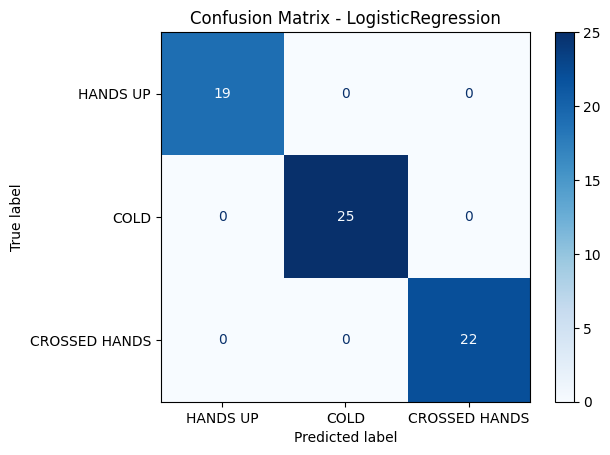

Metrics for RandomForestClassifier:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1 Score: 1.0


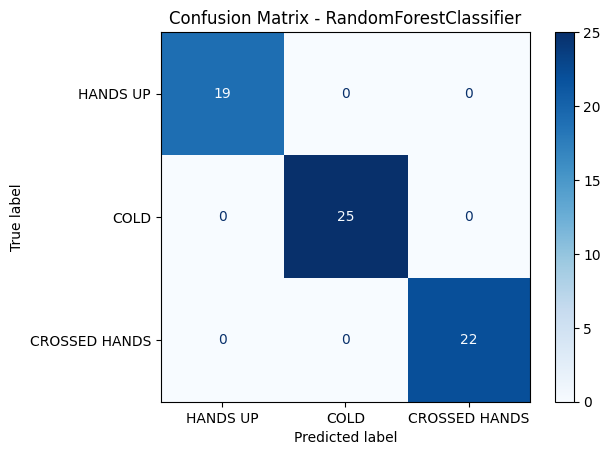

Metrics for GradientBoostingClassifier:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1 Score: 1.0


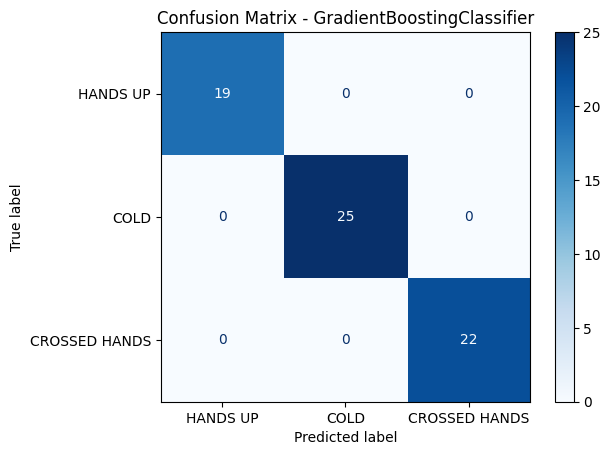


The best model (LogisticRegression) has been selected with accuracy 1.0


In [25]:
best_model = None
best_accuracy = 0.0
best_classifier_name = None
pdfADDE = "plots.pdf"
for clf_name, clf in classifiers.items():
    model, accuracy, classifier_name = train_and_evaluate_classifier(X_train, X_test, y_train, y_test, clf)
    pF = plot_confusion_matrix(pdfADDE, model, X_test, y_test, class_labels=df['class'].unique(), clf_name=classifier_name)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_classifier_name = classifier_name
pF.close()
print(f"\nThe best model ({best_classifier_name}) has been selected with accuracy {best_accuracy}")

In [52]:
print(best_model)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])


In [53]:
save_model(best_model, 'best_model.pkl')

The model has been saved as best_model.pkl
